In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# 1º Experimento

In [56]:
train_img_1 = cv2.imread('../data/imgs_teste/IMG_20231217_075101.jpg')
train_img_2 = cv2.imread('../data/imgs/dsc07631.jpg')
train_img_3 = cv2.imread('../data/imgs/dsc02595.jpg')

train_img_1_ = cv2.resize(train_img_1, (480,640))
train_img_2_ = cv2.resize(train_img_2, (480,640))
train_img_3_ = cv2.resize(train_img_3, (480,640))

In [57]:
name_imgs = ['IMG_20231217_075101', 'dsc07631', 'dsc02595']
train_imgs = [train_img_1_, train_img_2_, train_img_3_]

In [58]:
def report_detectors(name_img):
    detectors1 = ['harris', 'harris', 'sift']
    detectors2 = ['sift', 'star', 'star']
    for d1, d2 in zip(detectors1, detectors2):
        display(f'{d1} x {d2}')
        df = pd.read_csv(f'../results/{name_img}/kp_{d1}_{d2}/matches_{d1}_{d2}.csv')
        df[f'porcent_{d1}'] = np.where(df['qtd_matches'] > 0, round(df['qtd_matches'] / df[f'{d1}_qtd_keypoints'] * 100, 2), 0)
        df[f'porcent_{d2}'] = np.where(df['qtd_matches'] > 0, round(df['qtd_matches']/ df[f'{d2}_qtd_keypoints'] * 100,2), 0) 

        df[f'porcent_{d1}'] = df[f'porcent_{d1}'] / df[f'porcent_{d1}'].abs().max()
        df[f'porcent_{d2}'] = df[f'porcent_{d2}'] / df[f'porcent_{d2}'].abs().max()
        df[f'porcent_qtd_matches'] = df[f'qtd_matches'] / df[f'qtd_matches'].abs().max()

        df['best_result'] = df[f'porcent_{d1}'] + df[f'porcent_{d2}'] + df[f'porcent_qtd_matches']

        display(df.sort_values(by='best_result', ascending=False).head(1))

        columns = [f'{d1}_qtd_keypoints', f'{d2}_qtd_keypoints', 'qtd_matches']
        fig, ax = plt.subplots(1, len(columns), figsize=(16,5))
        for i, col in enumerate(columns):
            ax[i].boxplot(df[[col]], vert=True, manage_ticks=True, showfliers=True)
            ax[i].set_xlabel(col)

            quantiles = np.quantile(df[[col]], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
            ax[i].hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='b', ls=':', lw=0.5, zorder=0)
            ax[i].set_xlim(0.5, 1.5)
            # ax[i].set_xticks([1])
            ax[i].set_yticks(quantiles)
            # ax[i].yaxis.set_tick_params(labelsize=5)
        fig.suptitle(f'Detectores {d1} x {d2}')

## Primeiro conjunto de imagens

'harris x sift'

,harris_blockSize,harris_ksize,harris_k,harris_qtd_keypoints,sift_contrastThreshold,sift_edgeThreshold,sift_sigma,sift_qtd_keypoints,qtd_matches,match_keypoints,porcent_harris,porcent_sift,porcent_qtd_matches,best_result
724,2,3,0.08,93,0.04,10,0.8,2640,86,"[(192.13645935058594, 147.9002227783203), (207...",0.951533,0.231206,0.955556,2.138294


'harris x star'

,harris_blockSize,harris_ksize,harris_k,harris_qtd_keypoints,star_response_threshold,star_line_threshold_projected,star_line_threshold_binarized,star_suppress_nonmax_size,star_qtd_keypoints,qtd_matches,match_keypoints,porcent_harris,porcent_star,porcent_qtd_matches,best_result
16327,2,9,0.16,92,30,5,8,7,50,7,"[(213.0, 171.0), (218.0, 178.0), (250.0, 179.0...",0.228323,0.951734,0.583333,1.76339


'sift x star'

,sift_contrastThreshold,sift_edgeThreshold,sift_sigma,sift_qtd_keypoints,star_response_threshold,star_line_threshold_projected,star_line_threshold_binarized,star_suppress_nonmax_size,star_qtd_keypoints,qtd_matches,match_keypoints,porcent_sift,porcent_star,porcent_qtd_matches,best_result
208952,0.02,40,0.8,5059,5,30,16,2,458,725,"[(108.0, 309.0), (108.0, 309.0), (108.0, 309.0...",0.186905,0.549786,0.940337,1.677029


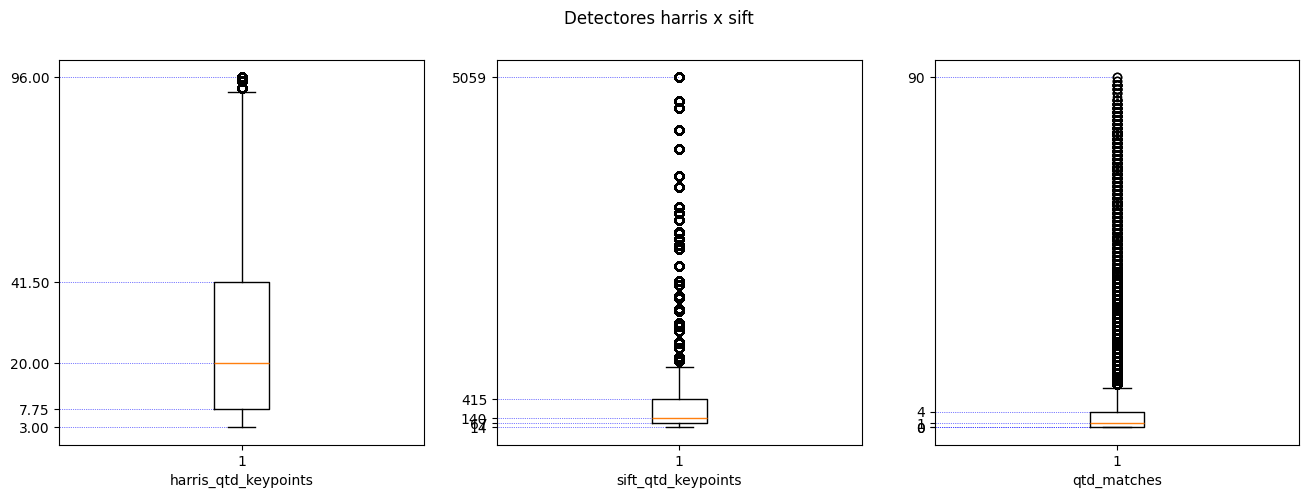

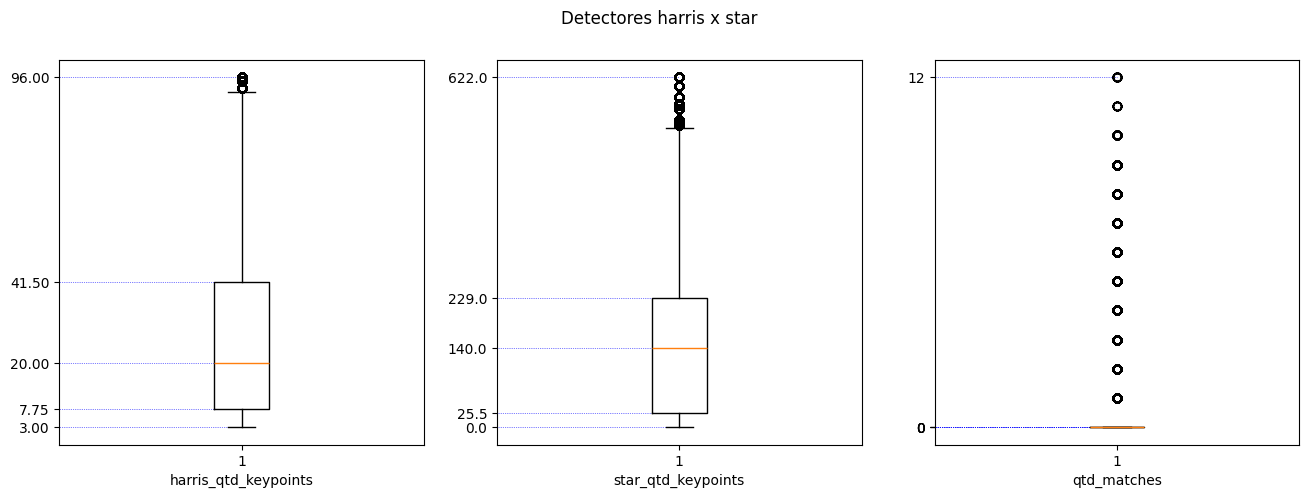

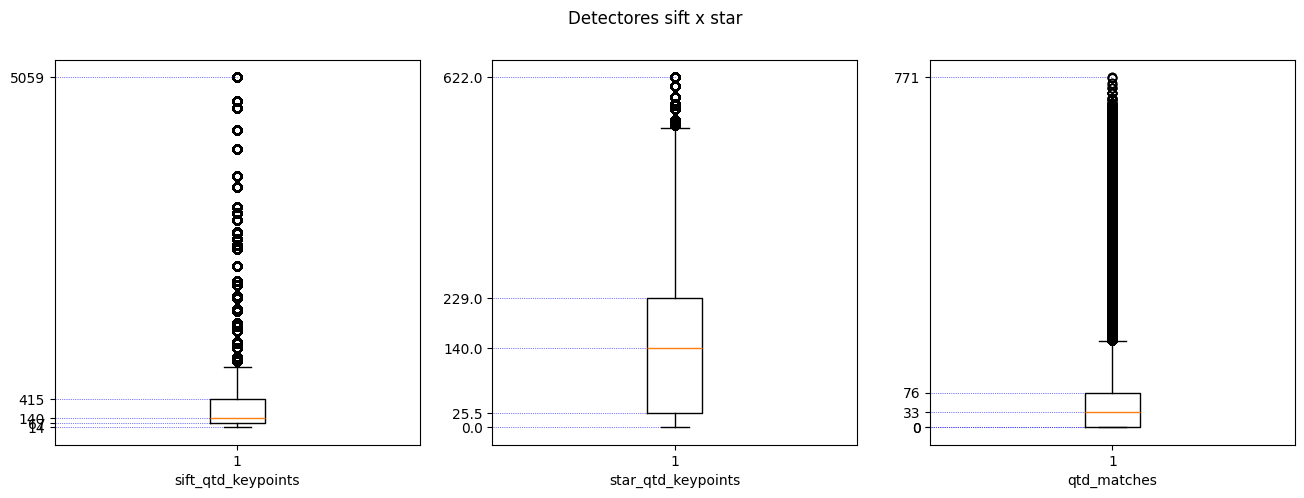

In [59]:
report_detectors(name_imgs[0])

## Segundo conjunto de imagens

'harris x sift'

,harris_blockSize,harris_ksize,harris_k,harris_qtd_keypoints,sift_contrastThreshold,sift_edgeThreshold,sift_sigma,sift_qtd_keypoints,qtd_matches,match_keypoints,porcent_harris,porcent_sift,porcent_qtd_matches,best_result
716,2,3,0.08,487,0.02,40,0.8,10171,312,"[(6.938558101654053, 2.4341416358947754), (397...",0.930979,0.239657,1.0,2.170636


'harris x star'

,harris_blockSize,harris_ksize,harris_k,harris_qtd_keypoints,star_response_threshold,star_line_threshold_projected,star_line_threshold_binarized,star_suppress_nonmax_size,star_qtd_keypoints,qtd_matches,match_keypoints,porcent_harris,porcent_star,porcent_qtd_matches,best_result
15604,2,9,0.16,225,30,30,8,2,470,28,"[(390.0, 20.0), (55.0, 41.0), (306.0, 53.0), (...",0.4976,0.584314,0.682927,1.764841


'sift x star'

,sift_contrastThreshold,sift_edgeThreshold,sift_sigma,sift_qtd_keypoints,star_response_threshold,star_line_threshold_projected,star_line_threshold_binarized,star_suppress_nonmax_size,star_qtd_keypoints,qtd_matches,match_keypoints,porcent_sift,porcent_star,porcent_qtd_matches,best_result
208957,0.02,40,0.8,10171,5,30,32,3,1464,1821,"[(18.0, 572.0), (18.0, 547.0), (18.0, 547.0), ...",0.268004,0.659544,1.0,1.927548


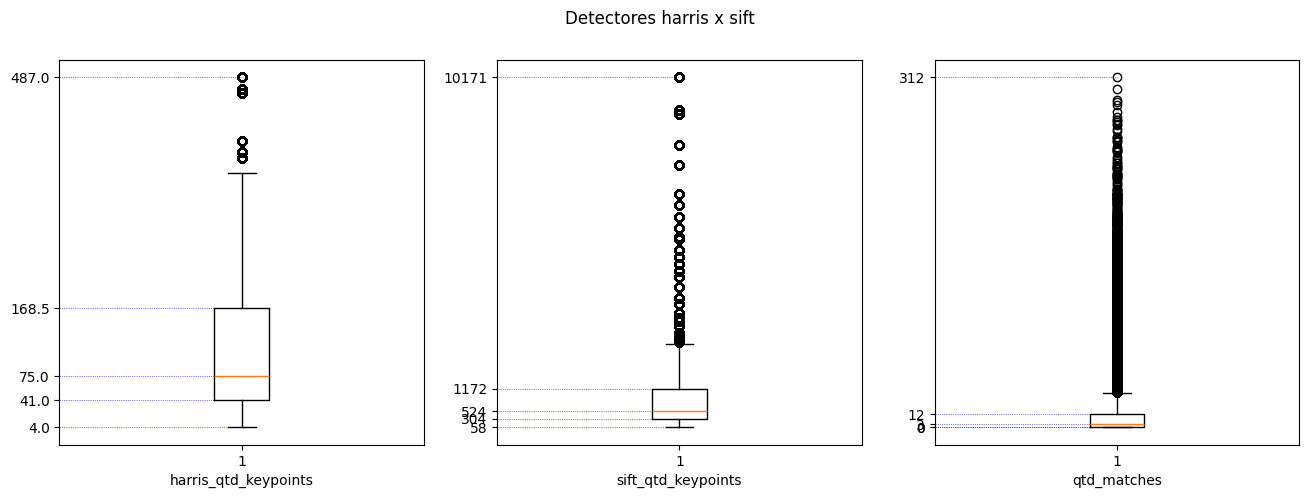

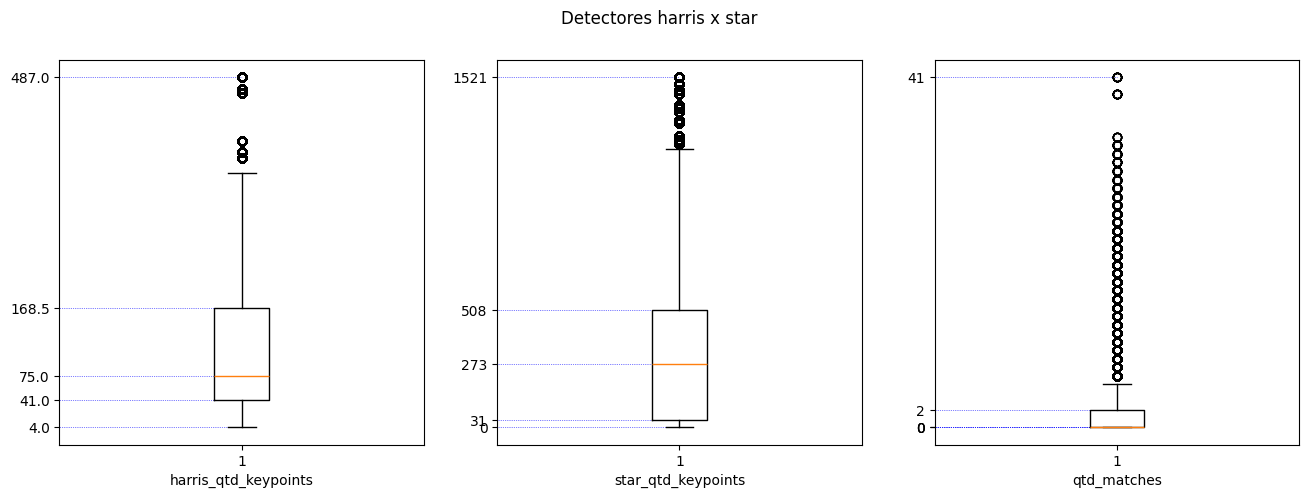

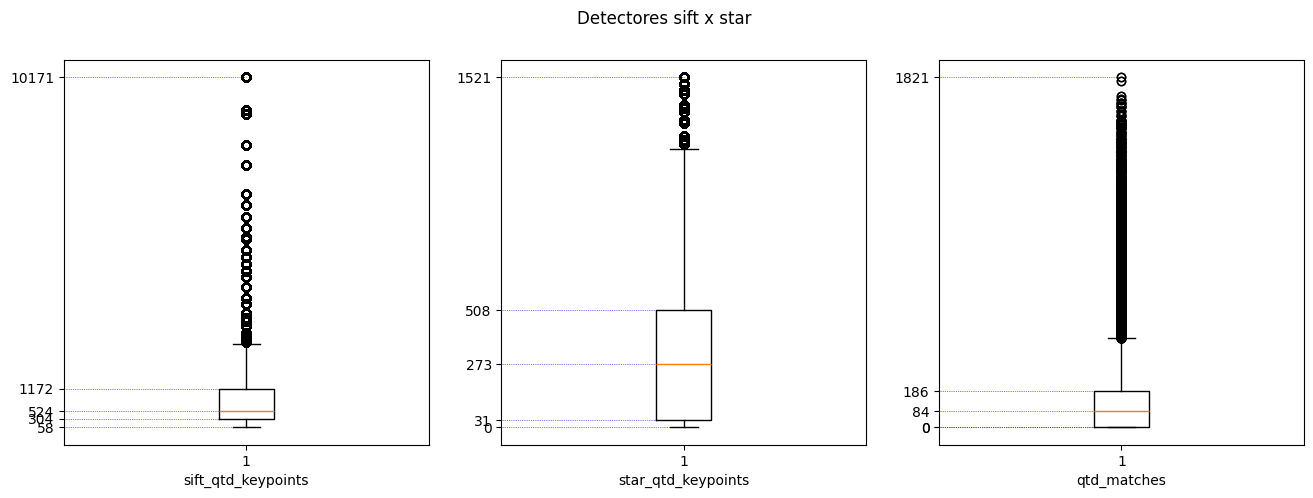

In [60]:
report_detectors(name_imgs[1])

## Terceiro conjunto de imagens

'harris x sift'

,harris_blockSize,harris_ksize,harris_k,harris_qtd_keypoints,sift_contrastThreshold,sift_edgeThreshold,sift_sigma,sift_qtd_keypoints,qtd_matches,match_keypoints,porcent_harris,porcent_sift,porcent_qtd_matches,best_result
460,2,3,0.04,695,0.02,40,0.8,18263,417,"[(233.21424865722656, 311.7081604003906), (303...",0.881446,0.142857,1.0,2.024303


'harris x star'

,harris_blockSize,harris_ksize,harris_k,harris_qtd_keypoints,star_response_threshold,star_line_threshold_projected,star_line_threshold_binarized,star_suppress_nonmax_size,star_qtd_keypoints,qtd_matches,match_keypoints,porcent_harris,porcent_star,porcent_qtd_matches,best_result
15540,2,9,0.16,571,20,30,8,2,1094,84,"[(263.0, 18.0), (263.0, 18.0), (245.0, 35.0), ...",0.595788,0.507601,0.857143,1.960531


'sift x star'

,sift_contrastThreshold,sift_edgeThreshold,sift_sigma,sift_qtd_keypoints,star_response_threshold,star_line_threshold_projected,star_line_threshold_binarized,star_suppress_nonmax_size,star_qtd_keypoints,qtd_matches,match_keypoints,porcent_sift,porcent_star,porcent_qtd_matches,best_result
208957,0.02,40,0.8,18263,5,30,32,3,2908,4110,"[(18.0, 543.0), (18.0, 543.0), (18.0, 530.0), ...",0.279018,0.676965,1.0,1.955983


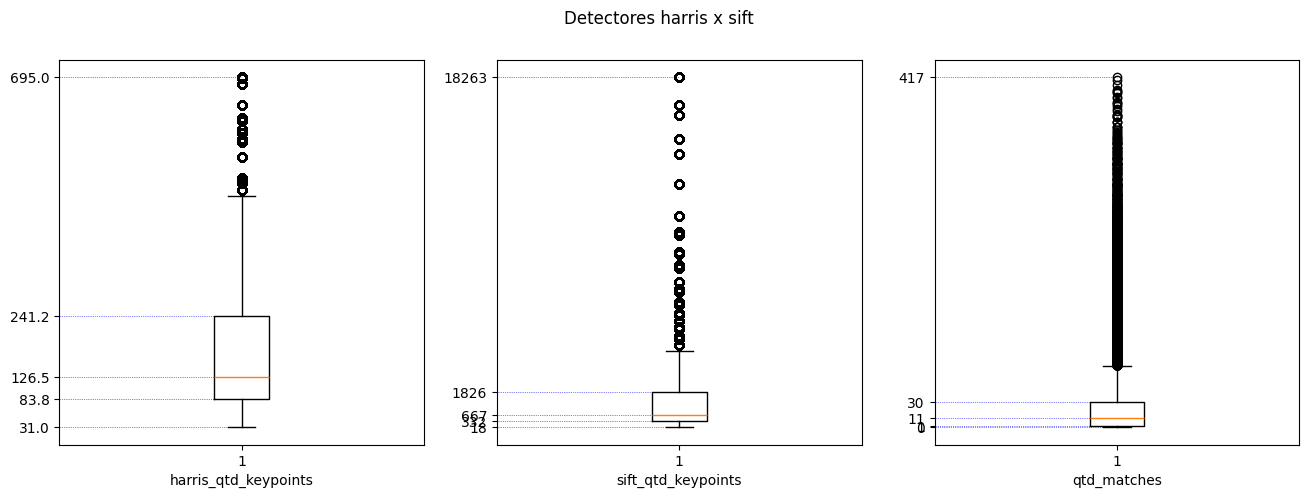

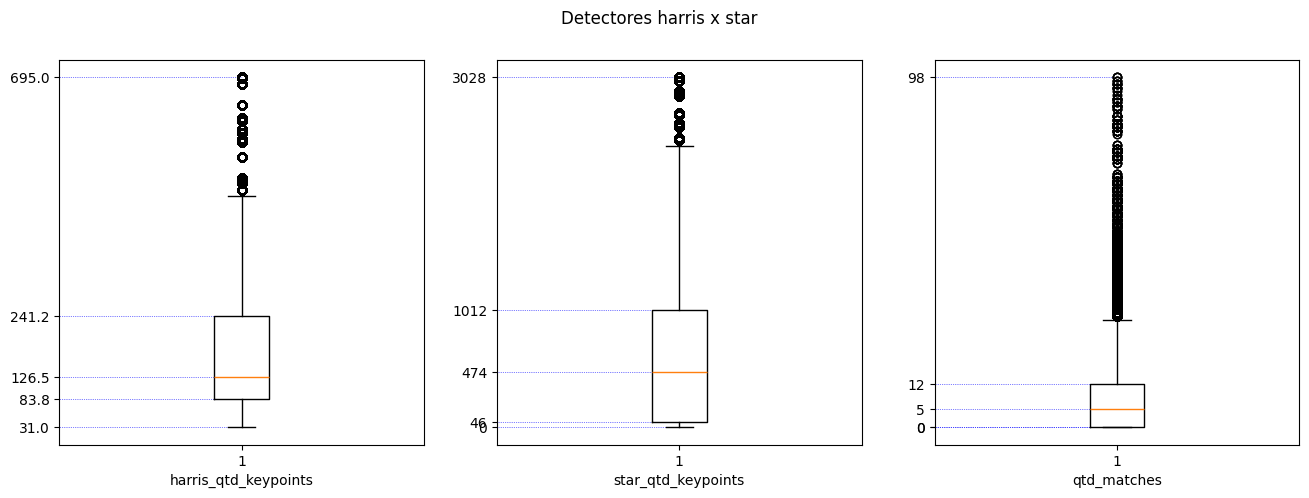

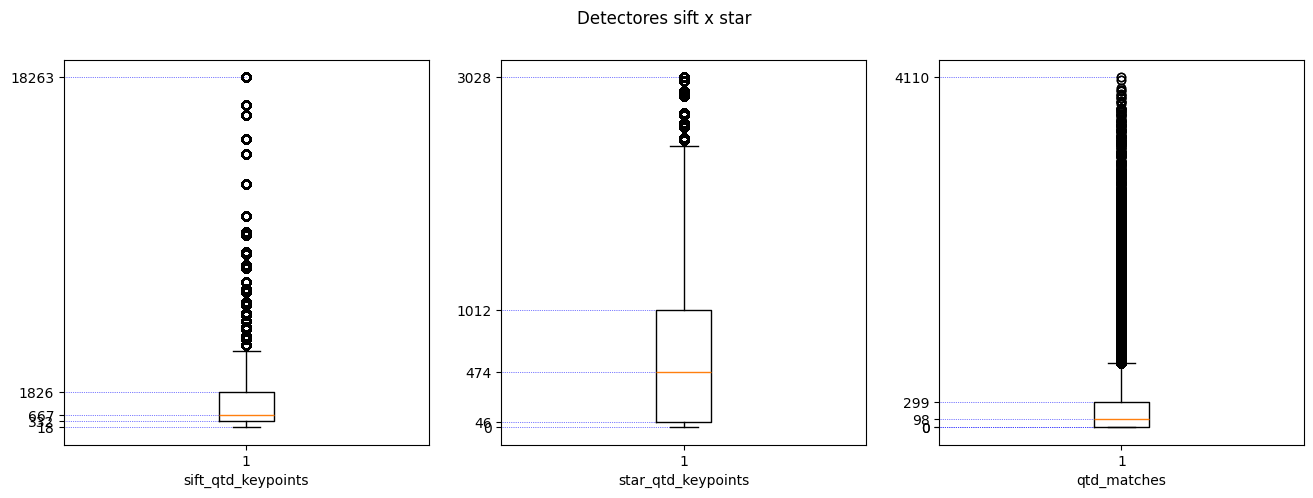

In [61]:
report_detectors(name_imgs[2])

# 2º Experimento

# 3º Experimento